In [35]:
from sklearn import datasets, model_selection, linear_model, metrics
from matplotlib.colors import ListedColormap
from matplotlib import pylab
from numpy import sqrt

## Generation datasets

In [2]:
clf_data, clf_target = datasets.make_classification(n_features=2, n_informative=2,
                                                    n_classes=2, n_redundant=0,
                                                    n_clusters_per_class=1, random_state=7)

reg_data, reg_target = datasets.make_regression(n_features=2, n_informative=1,
                                                    n_targets=1, noise=5., random_state=7)

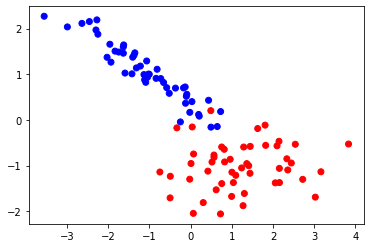

In [3]:
colors = ListedColormap(['red', 'blue'])
pylab.scatter(list(map(lambda x: x[0], clf_data)), list(map(lambda x: x[1], clf_data)), c=clf_target, cmap=colors)

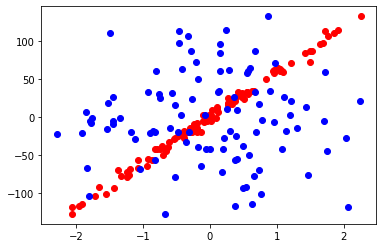

In [4]:
pylab.scatter(list(map(lambda x: x[1], reg_data)), reg_target, color='red')
pylab.scatter(list(map(lambda x: x[0], reg_data)), reg_target, color='blue')

In [5]:
clf_train_data, clf_test_data, clf_train_target, clf_test_target = model_selection.train_test_split(clf_data, clf_target, test_size=.3, random_state=1)
reg_train_data, reg_test_data, reg_train_target, reg_test_target = model_selection.train_test_split(reg_data, reg_target, test_size=.3, random_state=1)

### Метрики качества в задаче классификации
##### Обучаем модель

In [6]:
clf_class = linear_model.SGDClassifier(loss='log', random_state=1)
clf_class.fit(clf_train_data, clf_train_target)
predictions = clf_class.predict(clf_test_data)
possibility = clf_class.predict_proba(clf_test_data)
print('REAL TEST TARGET:')
print(clf_test_target)
print('PREDICT TEST TARGET:')
print(predictions)
print('POSSIBILITIES:')
print(possibility)

REAL TEST TARGET:
[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]
PREDICT TEST TARGET:
[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0]
POSSIBILITIES:
[[0.00000000e+00 1.00000000e+00]
 [9.99999997e-01 2.90779994e-09]
 [9.99990982e-01 9.01818055e-06]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 7.01333183e-14]
 [5.16838702e-07 9.99999483e-01]
 [6.66133815e-16 1.00000000e+00]
 [1.00000000e+00 6.21822808e-13]
 [0.00000000e+00 1.00000000e+00]
 [9.99999998e-01 2.30155106e-09]
 [9.99999697e-01 3.03286910e-07]
 [4.06373790e-03 9.95936262e-01]
 [0.00000000e+00 1.00000000e+00]
 [9.84496051e-09 9.99999990e-01]
 [1.00000000e+00 2.85780656e-10]
 [9.96681204e-01 3.31879568e-03]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 6.58409203e-15]
 [1.00000000e+00 1.62031980e-14]
 [7.25799421e-11 1.00000000e+00]
 [9.99999999e-01 1.11892650e-09]
 [9.99999727e-01 2.73211585e-07]
 [8.97506031e-01 1.02493969e-01]
 [1.00000000e+00 1.48816090e-12]
 [9.99999504e-01 4.96472653e-0

#### Самописная метрика accuracy

In [7]:
success = 0
for pair in zip(predictions, clf_test_target):
    if pair[0] == pair[1]:
        success += 1
accuracy = success / len(clf_test_target)
print(accuracy)
#А можно просто использовать готовую метрику
print(metrics.accuracy_score(clf_test_target, predictions))

0.9333333333333333
0.9333333333333333


### Матрица из теор вера
T=True
F=False
Принадлежность к классам T - действительно принадлежит классу и так и определили
F - не принадлежит классу или другая логика

    1   2

1   T   F

2   F   T

In [8]:
accuracy = metrics.confusion_matrix(predictions, clf_test_target)
print(accuracy)

[[17  1]
 [ 1 11]]


#### Оценка точности классификации

In [9]:
# pos_label - оценивает точность для конкретного лкасса
print(metrics.precision_score(clf_test_target, predictions, pos_label=0))
print(metrics.precision_score(clf_test_target, predictions, pos_label=1))
print(metrics.precision_score(clf_test_target, predictions))

0.9444444444444444
0.9166666666666666
0.9166666666666666


#### Оценка полноты

In [10]:
print(metrics.recall_score(predictions, clf_test_target, pos_label=0))
print(metrics.recall_score(predictions, clf_test_target, pos_label=1))
print(metrics.recall_score(predictions, clf_test_target, pos_label=1))

0.9444444444444444
0.9166666666666666
0.9166666666666666


### F мера

In [11]:
print(metrics.f1_score(predictions, clf_test_target, pos_label=0))
print(metrics.f1_score(predictions, clf_test_target, pos_label=1))
print(metrics.f1_score(predictions, clf_test_target))

0.9444444444444444
0.9166666666666666
0.9166666666666666


#### Вывод большого количества метрик

In [13]:
print(metrics.classification_report(predictions, clf_test_target))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Roc кривая

In [16]:
fpr, tpr, _ = metrics.roc_curve(clf_test_target, possibility[:,1])

array([2.00000000e+00, 1.00000000e+00, 9.99999483e-01, 9.95936262e-01,
       4.16708383e-01, 6.58409203e-15])

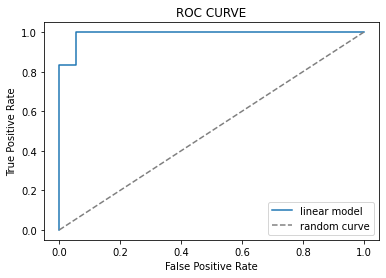

In [24]:
pylab.plot(fpr,tpr, label='linear model')
pylab.plot([0,1], [0,1], '--', color='grey', label='random curve')
pylab.xlim([-.05, 1.05])
pylab.ylim([-.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC CURVE')
pylab.legend(loc='lower right')

# Площадь под ROC кривой

In [26]:
print('ТОЛЬКО ПРЕДСКАЗАНИЯ', metrics.roc_auc_score(clf_test_target, predictions))
print('ВЕРОЯТНОСТИ ПРИНАДЛЕЖНОСТИ К 0 КЛАССУ', metrics.roc_auc_score(clf_test_target, possibility[:,1]))

ТОЛЬКО ПРЕДСКАЗАНИЯ 0.9305555555555554
ВЕРОЯТНОСТИ ПРИНАДЛЕЖНОСТИ К 0 КЛАССУ 0.9907407407407407


# Log-loss метрика (лучше когда меньше)

In [27]:
print(metrics.log_loss(clf_test_target, possibility[:,1]))

0.21767621111290084


### Метрики для регрессии

In [32]:
regress = linear_model.SGDRegressor(random_state=1, n_iter_no_change=20)
regress.fit(reg_train_data, reg_train_target)
predictions = regress.predict(reg_test_data)
print('PREDICT:')
print(predictions)
print('REAL:')
print(reg_test_target)
print(metrics.mean_absolute_error(reg_test_target, predictions))

PREDICT:
[ -1.10528035   6.84771392 -51.8819882    5.60417362 -24.12443169
  -8.21439926  64.29438474 -22.02061817  32.14714092 -40.45775375
 -17.57140062  32.58447477  28.63744348  -6.22246937  -2.85280197
 -82.00645827  88.75675598  16.18835816  24.48112293 -93.10222435
  15.72456028  33.52957308 100.26217755  23.14060516 -44.74143963
 -98.70507076  90.50169093   1.00412665 -16.51947704 -23.75267054]
REAL:
[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]
3.726715120276786


In [36]:
print(metrics.mean_squared_error(reg_test_target, predictions))
# Чаще берут корень
print(sqrt(metrics.mean_squared_error(reg_test_target, predictions)))

23.526008778524464
4.85036171625627


Коэффициент детерминации R2 score

In [37]:
print(metrics.r2_score(reg_test_target, predictions))

0.9895784923331762
